## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the titanic dataset and create a model that can predict if a passenger will survive the Titanic Shipwreck or not {0, 1}.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Columns:
- 'PassengerId': id of the passenger
- 'Survived': 
- 'Pclass': Ticket class
- 'Name': Name
- 'Sex': sex
- 'Age': Age in years
- 'SibSp': # of siblings / spouses aboard the Titanic
- 'Parch': # of parents / children aboard the Titanic
- 'Ticket': 
- 'Fare': Passenger fare
- 'Cabin': Cabin number
- 'Embarked': Port of Embarkation

In [2]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We check the distribution of variables for the column we want to predict.

In [3]:
# Calculate value counts for the Survived column
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

First, check for missing data and remove all columns containing missing data

In [4]:
def missingness_summary(df, print_log, sort):
  '''
  Return a pandas series containing the percentage of missing data in each column.
  
  Args:
  df - pandas dataframe 

  print_log (boolean) - if True, print out all of the columns in the dataframe, 
    one to a line, followed by the percentage of total rows that have a 
    null value for that column.
    
  sort (string) - specify if the output should be sorted in ascending order, 
    descending order, or not at all.
  '''
  if print_log == True:
    series = pd.Series(df.isnull().sum()*100/df.isnull().count())
    if sort == 'Ascending':
      series = series.sort_values(ascending = True)
    elif sort == 'Descending':
      series = series.sort_values(ascending=False)
    else:
      series
    return series

In [5]:
# Calculate NA values per column
missingness_summary(data, True, 'Descending')


Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

In [6]:
# drop columns with missing data
data.drop(['Cabin', 'Age', 'Embarked'], axis=1, inplace=True)

We also drop columns that are not informative and contain too many unique values(e.g. name)

In [7]:
# Calculate unique values for each column
print('\n'.join([f"Column with name '{c}' has {data[c].nunique()} unique values" for c in data.columns]))    

Column with name 'PassengerId' has 891 unique values
Column with name 'Survived' has 2 unique values
Column with name 'Pclass' has 3 unique values
Column with name 'Name' has 891 unique values
Column with name 'Sex' has 2 unique values
Column with name 'SibSp' has 7 unique values
Column with name 'Parch' has 7 unique values
Column with name 'Ticket' has 681 unique values
Column with name 'Fare' has 248 unique values


In [8]:
# Drop columns 'PassengerId', 'Name' and 'Ticket'.
data.drop(['Ticket', 'PassengerId', 'Name'], axis=1, inplace=True)

To use the data, we must convert all columns to numeric. Do this by replacing yes and no with 1 and 0.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [10]:
# Use get_dummies to get a dataset with one hot encoded columns for categorical variables
# Survived should be excluded.
dummies = pd.get_dummies(data, drop_first=True)


In [11]:
# Let's check the new columns
dummies['Sex_male']


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex_male, Length: 891, dtype: uint8

Split the data into train and test. Use 20% of the data for our test subset. We will use the train_test_split function from scikit-learn for this.

In [12]:
# Split the dataset. Remember that the y arrays should include only the 'Survived' column which should be excluded from
# the X arrays
from sklearn.model_selection import train_test_split
X = dummies.drop('Survived', axis=1)
y = dummies['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

Generate a KNN model with k=1 for the dataset. What is the accuracy score for the train and test subsamples?

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# answer below:
neighbors = KNeighborsClassifier(n_neighbors=1)
neighbors.fit(X_train, y_train)
print(neighbors.score(X_train, y_train))
print(neighbors.score(X_test, y_test))

0.8792134831460674
0.6703910614525139


Would you say the model overfits? Why or why not? Put your answer in the comment below.

Since the training data scores significantly higher than the test data, we can say the model overfits.

Let's optimize k. A good idea is to create plots that depict train and test accuracy for each candidate k. Since we have 2 classes, we will be selecting odd numbers in order to deal with possible ties. By selecting a really small k, e.g. k=1, we increase variance and the model is prone to overfitting since it will only take into account the nearest neighbor where there could be a lot of other close samples belonging to another class. By doing the opposite, selecting a big k we are prone to underfitting, as we increase bias as there is a higher probability to select the majority class.


In [14]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
k_list = range(1, 15, 2)

For each k value in the list created above we want to create and fit a knn instance on X_train, y_train and then make predictions both on the training set (X_train) as well as on the test set(X_test) and calculate accuracy and f1 score and append it to the corrensponding list.

In [15]:
# answer below:
for k in k_list:
  neighbors = KNeighborsClassifier(n_neighbors=k)
  neighbors.fit(X_train, y_train)
  train_preds = neighbors.predict(X_train)
  test_preds = neighbors.predict(X_test)
  accuracy_train.append(accuracy_score(y_train, train_preds))
  accuracy_test.append(accuracy_score(y_test, test_preds))
  f1_train.append(f1_score(y_train, train_preds))
  f1_test.append(f1_score(y_test, test_preds))


In [16]:
print(accuracy_train)
print(accuracy_test)
print(f1_train)
print(f1_test)

[0.8792134831460674, 0.8651685393258427, 0.8356741573033708, 0.8188202247191011, 0.8103932584269663, 0.7949438202247191, 0.7851123595505618]
[0.6703910614525139, 0.770949720670391, 0.7597765363128491, 0.7486033519553073, 0.7206703910614525, 0.7094972067039106, 0.6871508379888268]
[0.8430656934306568, 0.816793893129771, 0.7829313543599258, 0.7692307692307693, 0.755877034358047, 0.7383512544802868, 0.7320490367775832]
[0.5755395683453237, 0.6917293233082707, 0.6814814814814815, 0.689655172413793, 0.647887323943662, 0.638888888888889, 0.631578947368421]


In the following plot we want to select the k that achieves the highest test score. 

Create a two plots with each of them depicting the following information:
1. Two lines, one for training accuracy and one for test accuracy for each k value.
2. Two lines, one for training F1score and one for test F1 score for each k value.

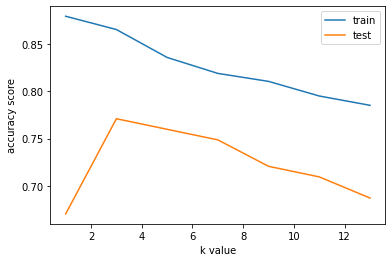

In [17]:
# answer below:
plt.plot(k_list, accuracy_train)
plt.plot(k_list, accuracy_test)
plt.xlabel('k value')
plt.ylabel('accuracy score')
plt.legend(['train', 'test'])
plt.show()


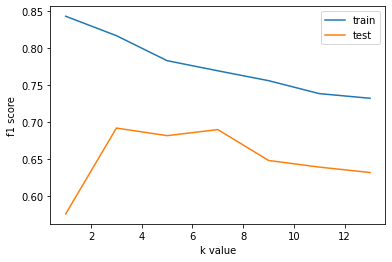

In [18]:
plt.plot(k_list, f1_train)
plt.plot(k_list, f1_test)
plt.xlabel('k value')
plt.ylabel('f1 score')
plt.legend(['train', 'test'])
plt.show()

Please comment the results of the plots above

As the k value increased both the accuracy and the f1 score for the training set decreased. Accuracy and f1 scores for the test set increased until k hit about 5 and then dropped. 
